In [8]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans


In [9]:
# Load the dataset
dataset = pd.read_csv('pinjaman_buku_2019.csv')
# Display the first few rows of the dataset to check the contents
dataset.head()


,Judul Buku,Jumlah Pinjaman,Lama Pinjaman (Hari)
0,101 Kisah,2,6
1,360 Days of Wonder,1,6
2,500 Tanda Jawab Transaksi Syariah Sehari-hari,2,11
3,Api Tauhid,6,24
4,Atlas Sejarah Nabi Muhammad SAW,3,5


In [10]:
# Extract relevant columns (Jumlah Pinjaman and Lama Pinjaman) for clustering
X = dataset.iloc[:, [1, 2]].values


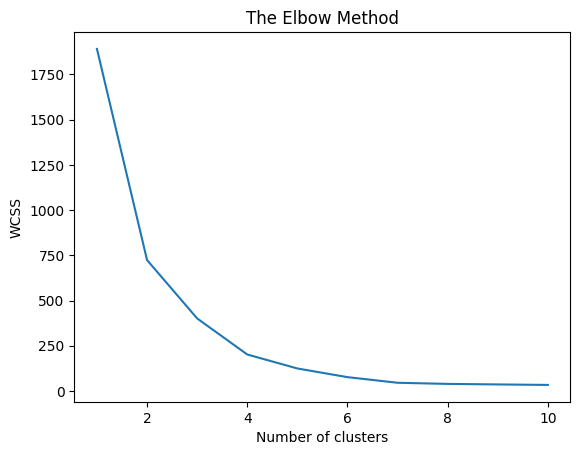

In [11]:
# Elbow method to find the optimal number of clusters
wcss = []  # List to store the Within-Cluster Sum of Squares (WCSS) for different cluster counts

# Calculate WCSS for cluster counts from 1 to 10
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the WCSS values to visualize the Elbow method
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [12]:
# Applying k-means to the dataset with the optimal number of clusters (3 in this case)
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0)
y_kmeans = kmeans.fit_predict(X)

# Adding the cluster labels to the original dataset
dataset['Cluster'] = y_kmeans


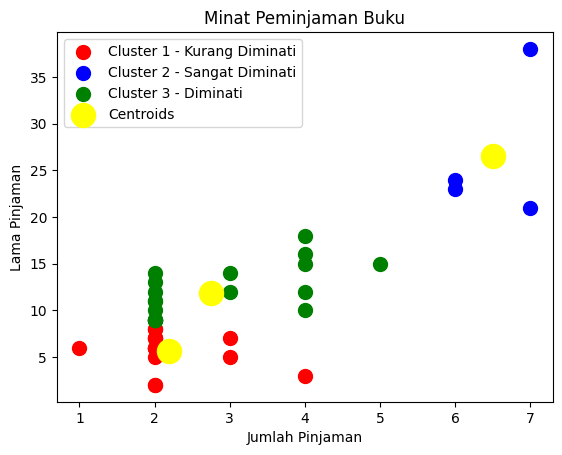

In [13]:
# Plotting the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1 - Kurang Diminati')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2 - Sangat Diminati')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3 - Diminati')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Minat Peminjaman Buku')
plt.xlabel('Jumlah Pinjaman')
plt.ylabel('Lama Pinjaman')
plt.legend()
plt.show()


In [14]:
# Summarizing books in each cluster
cluster_data = []

# Iterate through each cluster number and summarize the books
for cluster_num in range(3):
    cluster_books = dataset.loc[dataset['Cluster'] == cluster_num, 'Judul Buku'].tolist()
    books_summary = f"Total books: {len(cluster_books)}"
    cluster_data.append({'Cluster': f'Cluster {cluster_num + 1}', 'Books Summary': books_summary})

# Creating a DataFrame for the cluster summary
cluster_table = pd.DataFrame(cluster_data)

# Setting display options to show the full table
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Display the cluster summary table
print(cluster_table)


     Cluster    Books Summary
0  Cluster 1  Total books: 16
1  Cluster 2   Total books: 4
2  Cluster 3  Total books: 20
